<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Calibri; font-size:1.3em;">An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("insurance_data.csv")

In [7]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [8]:
df=df.drop(["Agency_Code"],axis=1)

In [9]:
df.head(2)

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.7,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.0,Online,34,20.00,Customised Plan,ASIA


<span style="font-family:Calibri; font-size:1.3em;"> We do not require the Travel agency ID for processing the CART, Random Forest and ANN, hence we are droping the Agency code from the dataset.

In [10]:
df.shape

(3000, 9)

<span style="font-family:Calibri; font-size:1.3em;">The data set consit of 3000 rows and 9 columns

In [11]:
df.isnull().sum()

Age             0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

<span style="font-family:Calibri; font-size:1.3em;">The dataset is not having any null values or NAN values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
Age             3000 non-null int64
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


<span style="font-family:Calibri; font-size:1.3em;">We could identify that the data set has data type as "Object", "Integer" and "Float". We have to convert the "Object" data type to" Integer".In this dataset Type, Claimed, Channel, Product Name and Destination are in object which we have to convert to integer data type.

<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/>Check the Duplicates


In [13]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of rows before discarding duplicates = 3000
Number of rows after discarding duplicates = 2861


In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 9)


<span style="font-family:Calibri; font-size:1.3em;">We could identify that there were some duplicate rows in the dataset. We are droping those duplicates. Now the sahpe of the dataset is 2861 rows and 9 columns


<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Check the Object Data type

In [15]:
for column in df[['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 
                   'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
30     91
35     91
48    107
31    124
36    880
Name: Age, Length: 70, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


COMMISION :  324
0.50        1
12.45       1
46.80       1
21.35       1
17.55       1
         ... 
7.70       57
63.21      59
54.00      59
23.76      61
0.00     1239
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
8       71
9       75
11      77
6       77
10      78
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     57
252.85     57
22.00      79
10.00     122
20.00     172
Name: Sales, Length: 380, dtype: int64


PRODUCT NAME :

<span style="font-family:Calibri; font-size:1.3em;"> We could find that the Claimed is defined as "Yes" or "No" objects.
    Type is as "Airlines" or "Travel Agency". Channels is defined as " Offline" and "Online". There are 5 product plans. The destination is marked as " Europe", " Americas" and "Asia"

<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Convert DType "Object" to Categorical variable

In [16]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


<span style="font-family:Calibri; font-size:1.3em;"> Now the data type is all changed as to variables 
    * Type is showing 0 as Airline and 1 as Travel Agency
    *Calimed is showing No as 0 and Yes as 
    *Channels is now showing as online as 1 and Offline as 0 *Product Name is showing as Bronze Plan as 2, Cancellation as 1, Customised plan as 0, Gold plan as 4 and Silver plan as 3
    * Destination of travel is now showing Asia as 0, Americas as 1 and Europe as 2

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
Age             2861 non-null int64
Type            2861 non-null int8
Claimed         2861 non-null int8
Commision       2861 non-null float64
Channel         2861 non-null int8
Duration        2861 non-null int64
Sales           2861 non-null float64
Product Name    2861 non-null int8
Destination     2861 non-null int8
dtypes: float64(2), int64(2), int8(5)
memory usage: 125.7 KB


<span style="font-family:Calibri; font-size:1.3em;"> Now we can see all the data type is showing all as integers and floats

<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> EDA of Dataset

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


 <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Identifying Outliers

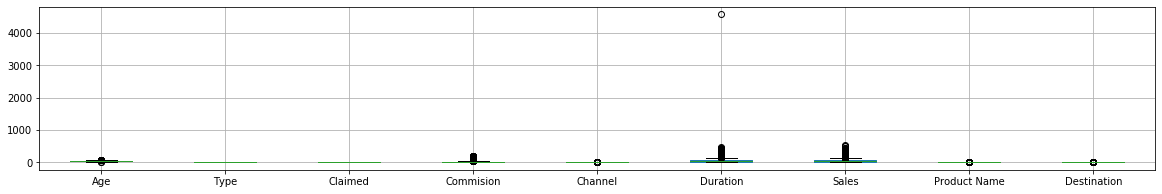

In [19]:
df.boxplot(figsize=(20,3))

<span style="font-family:Calibri; font-size:1.3em;"> "Age", "Commission","Duration" and "Sales" are having outliers.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


 <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Treatment of Outliers

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
lratio,uratio=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uratio,uratio,df['Age'])
df['Age']=np.where(df['Age']<lratio,lratio,df['Age'])

lratio,uratio=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>uratio,uratio,df['Commision'])
df['Commision']=np.where(df['Commision']<lratio,lratio,df['Commision'])

lratio,uratio=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>uratio,uratio,df['Duration'])
df['Duration']=np.where(df['Duration']<lratio,lratio,df['Duration'])

lratio,uratio=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>uratio,uratio,df['Sales'])
df['Sales']=np.where(df['Sales']<lratio,lratio,df['Sales'])

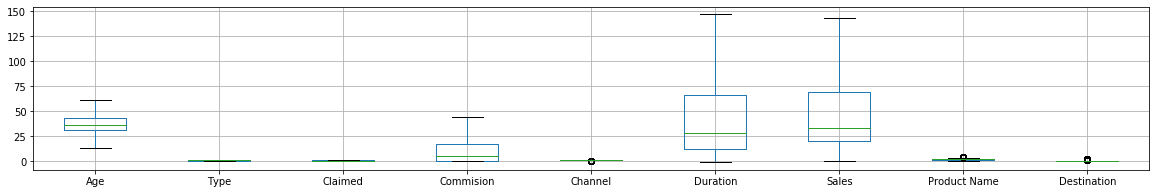

In [23]:
df.boxplot(figsize=(20,3))

<span style="font-family:Calibri; font-size:1.3em;"> We have trated all the outliers of the dataset even though CART and Random Forest are robust to outliers.

 <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Correlation of the dataset

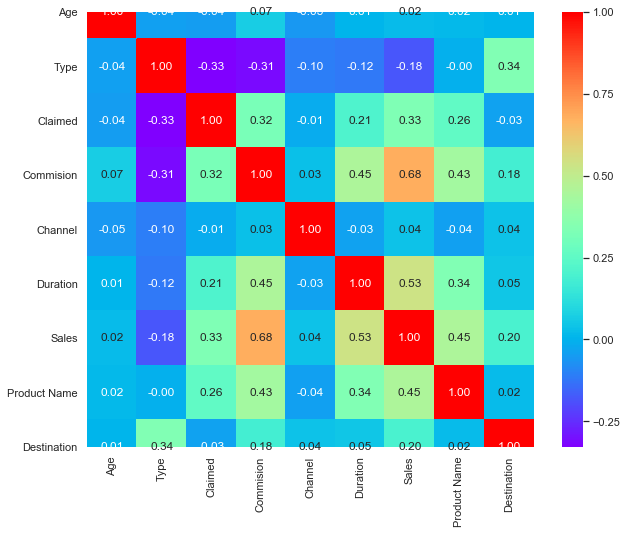

In [24]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

<span style="font-family:Calibri; font-size:1.3em;"> The Heat map shows the Redish colour as highly correlated and Blue as less correlation. Here data is low correlated. Most of the data are positively correlated.

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Proportion of 1's and 0's

Percentage of 0's 68.05 %
Percentage of 1's 31.95 %


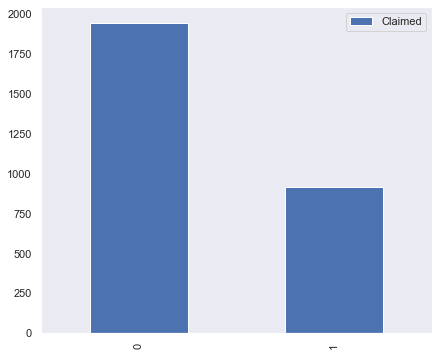

In [25]:
plt.figure(figsize=(7,6))
df['Claimed'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
print("Percentage of 0's",round(df.Claimed.value_counts().values[0]/df.Claimed.count()*100,2),'%')
print("Percentage of 1's",round(df.Claimed.value_counts().values[1]/df.Claimed.count()*100,2),'%')

<span style="font-family:Calibri; font-size:1.3em;"> 0 indicates "No" Claims and 1 indicates "Claimed". The data sets says that 68% percent have not claimed their travel insurance and 31% have claimed their travel insurance.

<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Extracting the target column into separate vectors for training set and test set

In [26]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

<B/> <span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Decision Tree Model (CART)

In [27]:
dtree = DecisionTreeClassifier(random_state=0)

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('d:\Insurance_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

In [31]:
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.175144
Type          0.003174
Commision     0.107796
Channel       0.009219
Duration      0.237760
Sales         0.209660
Product Name  0.224503
Destination   0.032744


www.webgraphviz.com

In [32]:
y_predict = dtree.predict(X_test)

In [33]:
reg_dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,min_samples_leaf=10,min_samples_split=150,random_state=0)
reg_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [34]:
Insurance_tree_regularized = open('d:\Insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dtree, out_file= Insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

Insurance_tree_regularized.close()

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.175144
Type          0.003174
Commision     0.107796
Channel       0.009219
Duration      0.237760
Sales         0.209660
Product Name  0.224503
Destination   0.032744


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Predict the Train & Test Data

In [35]:
ytrain_predict = reg_dtree.predict(X_train)
ytest_predict = reg_dtree.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       569
           1       0.52      0.54      0.53       290

    accuracy                           0.68       859
   macro avg       0.64      0.65      0.65       859
weighted avg       0.68      0.68      0.68       859



<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC Curve for Train Data

AUC: 0.826


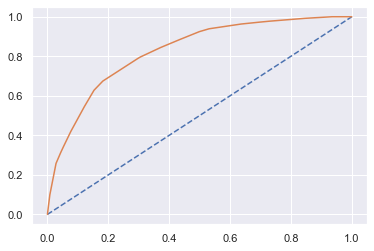

In [37]:
# predict probabilities
probs = reg_dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC Curve for Test Data

AUC: 0.784


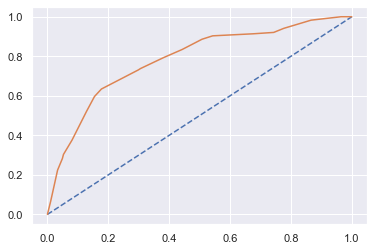

In [38]:
# predict probabilities
probs = reg_dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Train Data

In [39]:
confusion_matrix(y_train, ytrain_predict)

array([[1167,  211],
       [ 232,  392]], dtype=int64)

In [40]:
cart_train_acc=reg_dtree.score(X_train,y_train) 
cart_train_acc

0.7787212787212787

In [41]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.63
cart_train_recall  0.64
cart_train_f1  0.65


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Test Data

In [42]:
confusion_matrix(y_test, ytest_predict)

array([[481,  88],
       [117, 173]], dtype=int64)

In [246]:
cart_test_acc=reg_dtree.score(X_test,y_test)
cart_test_acc

0.7613504074505238

In [247]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       569
           1       0.52      0.61      0.56       290

    accuracy                           0.68       859
   macro avg       0.65      0.66      0.65       859
weighted avg       0.69      0.68      0.68       859



In [242]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.61
cart_test_recall  0.56
cart_test_f1  0.52


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> ROC Curve for CART

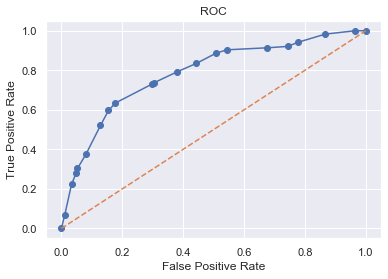

In [46]:
dt_fpr, dt_tpr,_=roc_curve(y_test,reg_dtree.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Cart Conclusion

Train Data:
AUC: 82.6%
Accuracy: 77.8%
Sensitivity: 64%
Precision: 63%
f1-Score: 65%

Test Data:
AUC: 78.4%
Accuracy:76.1%
Sensitivity: 63%
Precision: 60%
f1-Score: 66%

Training and Test set results are almost similar, where we can conclude by saying model is a good one.

<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Building a Random Forest Classifier

In [47]:
rfcl = RandomForestClassifier(n_estimators = 350, random_state=0,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)

In [48]:
rfcl.oob_score_

0.7337662337662337

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'max_depth': [7],#10
    'max_features': [4],#6
    'min_samples_leaf': [50],#150
    'min_samples_split': [150],#550
    'n_estimators': [350]#50
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [52]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 350}

In [53]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
best_grid=grid_search.best_estimator_

In [55]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Train Data

In [57]:
confusion_matrix(y_train,ytrain_predict)

array([[1259,  119],
       [ 342,  282]], dtype=int64)

In [58]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.7697302697302697

In [59]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1378
           1       0.70      0.45      0.55       624

    accuracy                           0.77      2002
   macro avg       0.74      0.68      0.70      2002
weighted avg       0.76      0.77      0.75      2002



In [60]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.45
rf_train_recall  0.55
rf_train_f1  0.7


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC for Train Data

Area under Curve is 0.6827830188679244


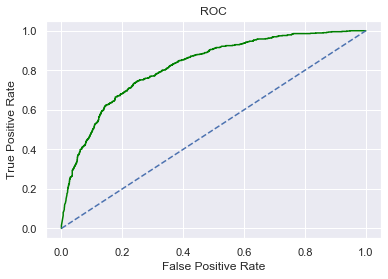

In [61]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Test Data

In [62]:
confusion_matrix(y_test,ytest_predict)

array([[516,  53],
       [171, 119]], dtype=int64)

In [63]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

0.7392316647264261

In [64]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       569
           1       0.69      0.41      0.52       290

    accuracy                           0.74       859
   macro avg       0.72      0.66      0.67       859
weighted avg       0.73      0.74      0.72       859



In [65]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.41
rf_test_recall  0.52
rf_test_f1  0.69


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC for Test Data

Area under Curve is 0.6585994788194656


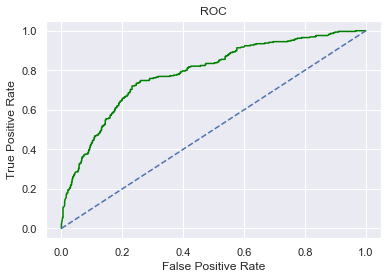

In [66]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [67]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.423810
Sales         0.187196
Commision     0.164353
Type          0.146618
Duration      0.051769
Age           0.021219
Destination   0.005036
Channel       0.000000


<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Building an Artificial Nural Network

In [86]:
SC=StandardScaler()

In [88]:
X_Train=SC.fit_transform(X_train)

In [223]:
param_grid = {
    'hidden_layer_sizes': [350], #,50,100
    'max_iter': [2000], #5000,2500,1500
    'solver': ['sgd'], #sgd, adam
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [224]:
grid_search.fit(X_train, y_train)
grid_search.best_params_c

{'hidden_layer_sizes': 350, 'max_iter': 2000, 'solver': 'sgd', 'tol': 0.01}

In [225]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=350, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [226]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Train Data

In [227]:
confusion_matrix(y_train,ytrain_predict)

array([[985, 393],
       [217, 407]], dtype=int64)

In [228]:
nn_train_acc=best_grid.score(X_train,y_train) 
nn_train_acc

0.6953046953046953

In [229]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1378
           1       0.51      0.65      0.57       624

    accuracy                           0.70      2002
   macro avg       0.66      0.68      0.67      2002
weighted avg       0.72      0.70      0.70      2002



In [230]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.57
nn_train_f1  0.51


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC for Train Data

Area under Curve is 0.6835238268021288


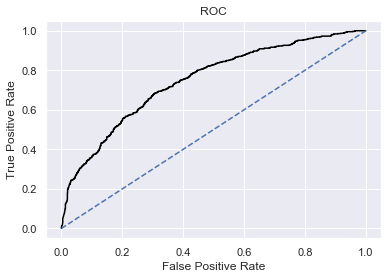

In [231]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> Confusion Matrix for Test Data

In [232]:
confusion_matrix(y_test,ytest_predict)

array([[405, 164],
       [112, 178]], dtype=int64)

In [233]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

0.6786961583236322

In [234]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       569
           1       0.52      0.61      0.56       290

    accuracy                           0.68       859
   macro avg       0.65      0.66      0.65       859
weighted avg       0.69      0.68      0.68       859



In [235]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.61
nn_test_recall  0.56
nn_test_f1  0.52


<span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/> AUC for Test Data

Area under Curve is 0.6627840736925036


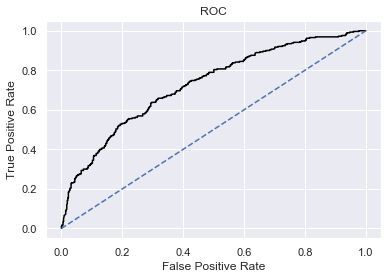

In [245]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [237]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=350, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)>

<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Final Conclusion

<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>Comparison of the performance metrics from the 3 models

In [249]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.76,0.77,0.74,0.70,0.68
AUC,0.83,0.78,0.68,0.66,0.68,0.66
Recall,0.64,0.56,0.55,0.52,0.57,0.56
Precision,0.63,0.61,0.45,0.41,0.65,0.61
F1 Score,0.65,0.52,0.70,0.69,0.51,0.52


<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>ROC Curve for the 3 models on the Training data

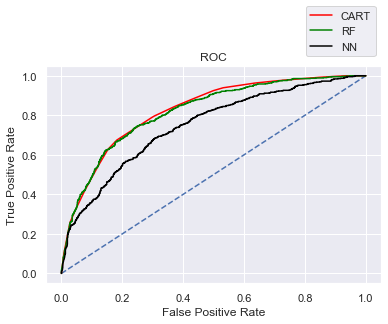

In [250]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<B/><span style="font-family:Calibri; font-size:1.5em;"><font color="Blue"/>ROC Curve for the 3 models on the Test data

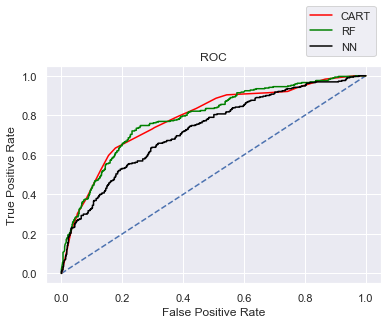

In [251]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<span style="font-family:Calibri; font-size:1.3em;">Compared to the three models, CART and Random forest are the strongest models. Here we could find the Product Name has a significant role in getting the insurance claimed or not. We could find the majority of the travellers have not claimed their insurance. Hence the business should increase the sale in the best product plan that would help the business in getting less claims.